## Problem Statement
Given the following data set, use the sklearn package to find the co-efficients of the line that describes the following relationships:

1) x1 and y

2) x2 and y

3) x3 and y

Also, plot the line and the data using matplotlib and report the co-efficient of determination for the lines using the metrics library.

## OUTPUT
The equation of the lines and the r2 values for the 3 lines. Also visualization of the goodness of fit.

In [21]:
#import the necessary library 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
#load the given data 
data = [[230.1,37.8,69.2,22.1],[44.5,39.3,45.1,10.4],[17.2,45.9,69.3,9.3],[151.5,41.3,58.5,18.5],[180.8,10.8,58.4,12.9],
        [8.7,48.9,75,7.2],[57.2,32.8,23.5,11.8],[120.2,19.6,11.6,13.2],[8.6,2.1,1,4.8],[199.8,2.6,21.2,10.6],[66.1,5.8,24.2,8.6],
       [214.7,24,4,17.4],[23.8,35.1,65.9,9.2],[97.5,7.6,7.2,9.7],[204.1,32.9,46,19]]

In [4]:
#create the dataframe using the above data 
df = pd.DataFrame(data,columns=['TV','Radio','Newspaper','Sales'])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.2,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
#check the data using describe
df.describe()

,TV,Radio,Newspaper,Sales
count,15.000000,15.000000,15.000000,15.000000
mean,108.320000,25.766667,38.673333,12.313333
std,82.309965,16.448737,26.589592,4.888889
min,8.600000,2.100000,1.000000,4.800000
25%,34.150000,9.200000,16.400000,9.250000
50%,97.500000,32.800000,45.100000,10.600000
75%,190.300000,38.550000,62.200000,15.300000
max,230.100000,48.900000,75.000000,22.100000


In [6]:
#check the information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
TV           15 non-null float64
Radio        15 non-null float64
Newspaper    15 non-null float64
Sales        15 non-null float64
dtypes: float64(4)
memory usage: 560.0 bytes


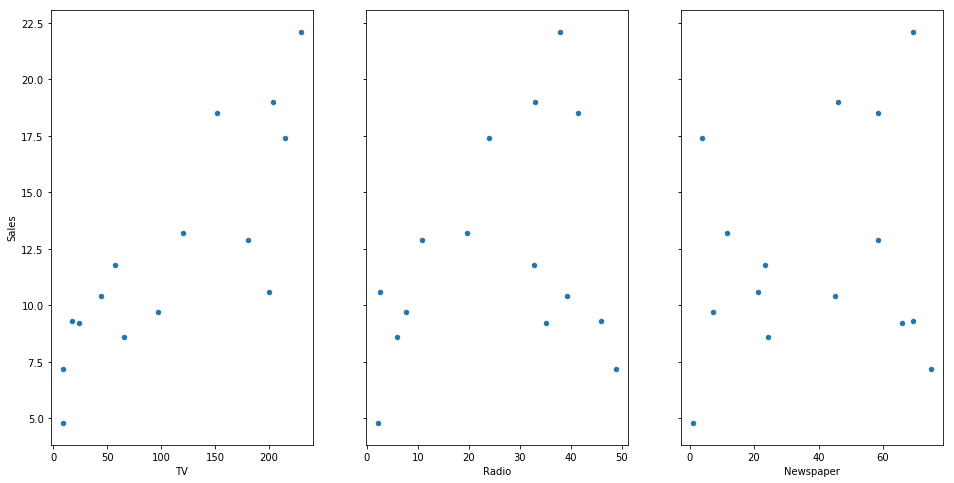

In [7]:
# visualize the relationship between the features and the response using scatterplots
fig , ax = plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV' , y='Sales',ax=ax[0], figsize=(16,8))
df.plot(kind='scatter' , x='Radio',y='Sales',ax=ax[1])
df.plot(kind='scatter' , x='Newspaper' , y='Sales',ax=ax[2])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()

In [10]:
x_data=df.iloc[: , :3]
x_data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.2,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [11]:
y_data=df.iloc[:,3:]
y_data

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [12]:
#fit the data into the Linear Regression model
reg.fit(x_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#find the coeeicirnt of the data 
reg.coef_

array([[ 0.05460128,  0.17116861, -0.0272604 ]])

In [14]:
list1=reg.coef_[0].tolist()
list1

[0.054601278632609204, 0.17116860634005718, -0.02726040313677276]

In [15]:
list2=x_data.columns.tolist()
list2

['TV', 'Radio', 'Newspaper']

In [16]:
data1 = zip(list2,list1)
data1

In [17]:
#coefficient of the line 
df_coff=pd.DataFrame(list(data1),columns=['names','coefficient'])
print('Co-efficinet of independent variables with Dependent variable Sales is as follows: ')
df_coff

Co-efficinet of independent variables with Dependent variable Sales is as follows: 


,names,coefficient
0,TV,0.054601
1,Radio,0.171169
2,Newspaper,-0.027260


In [20]:
#intercept value 
reg.intercept_

array([3.04272907])

In [22]:
#Calulating the linear regression using Satats model
lm_new = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()
lm_new.conf_int()
lm_new.summary()

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           6.18e-06
Time:                        23:38:16   Log-Likelihood:                -26.856
No. Observations:                  15   AIC:                             61.71
Df Residuals:                      11   BIC:                             64.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0427      1.120      2.716      0.020       0.577       5.508
TV             0.0546      0.006      9.745      0.000       0.042       0.067
Radio          0.1712      0.041      4.144      0.002       0.080       0.262
Newspaper     -0.0273      0.025     -1.081      0.303      -0.083       0.028
==============================================================================
Omnibus:                        2.758   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.646
Skew:                          -0.809   Prob(JB):                        0.439
Kurtosis:                       2.866   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Linear Regression TV and Sales 
lm_TV = smf.ols(formula='Sales ~ TV', data=df).fit()
lm_TV.conf_int()
lm_TV.summary()

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     28.42
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           0.000136
Time:                        23:41:09   Log-Likelihood:                -35.880
No. Observations:                  15   AIC:                             75.76
Df Residuals:                      13   BIC:                             77.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9840      1.240      5.632      0.000       4.305       9.663
TV             0.0492      0.009      5.331      0.000       0.029       0.069
==============================================================================
Omnibus:                        1.602   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                0.769
Skew:                          -0.554   Prob(JB):                        0.681
Kurtosis:                       2.939   Cond. No.                         227.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_new = pd.DataFrame({'TV': [df.TV.min(), df.TV.max()]})
X_new.head()

,TV
0,8.6
1,230.1


In [27]:
preds = lm_TV.predict(X_new)
preds

0     7.407095
1    18.304927
dtype: float64

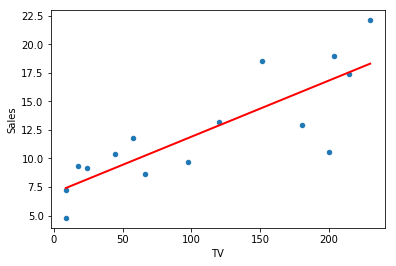

In [28]:
#Linear Regression Line using scatter plot 
df.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


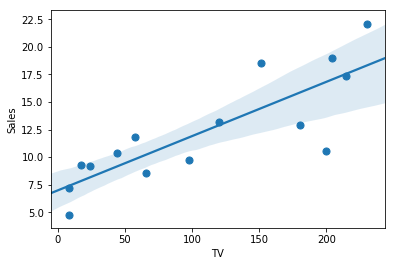

In [29]:
#Linear Regression Line using Seaboran Regression Plot 
sns.regplot(x='TV',y='Sales',data=df,x_estimator=np.mean)

In [31]:
#Linear Regression Radio and Sales
lm_radio = smf.ols(formula='Sales ~ Radio', data=df).fit()
lm_radio.conf_int()
lm_radio.summary()

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.304
Date:                Mon, 01 Apr 2019   Prob (F-statistic):              0.274
Time:                        23:42:56   Log-Likelihood:                -43.854
No. Observations:                  15   AIC:                             91.71
Df Residuals:                      13   BIC:                             93.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0009      2.379      4.204      0.001       4.861      15.141
Radio          0.0897      0.079      1.142      0.274      -0.080       0.260
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.751
Skew:                           0.295   Prob(JB):                        0.687
Kurtosis:                       2.076   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_new = pd.DataFrame({'Radio': [df.Radio.min(), df.Radio.max()]})
X_new.head()

,Radio
0,2.1
1,48.9


In [33]:
preds = lm_radio.predict(X_new)
preds

0    10.189395
1    14.389408
dtype: float64

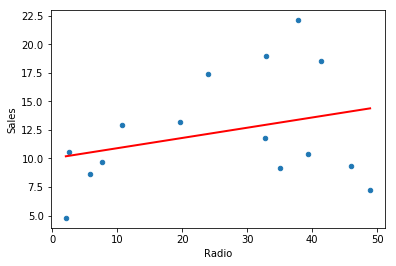

In [34]:
df.plot(kind='scatter', x='Radio', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


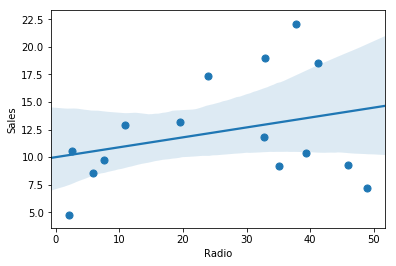

In [35]:
sns.regplot(x='Radio',y='Sales',data=df,x_estimator=np.mean)

In [36]:
lm_newspaper = smf.ols(formula='Sales ~ Newspaper', data=df).fit()
lm_newspaper.conf_int()
lm_newspaper.summary()

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.5395
Date:                Mon, 01 Apr 2019   Prob (F-statistic):              0.476
Time:                        23:44:30   Log-Likelihood:                -44.266
No. Observations:                  15   AIC:                             92.53
Df Residuals:                      13   BIC:                             93.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8940      2.320      4.696      0.000       5.882      15.906
Newspaper      0.0367      0.050      0.734      0.476      -0.071       0.145
==============================================================================
Omnibus:                        1.540   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.120
Skew:                           0.442   Prob(JB):                        0.571
Kurtosis:                       1.994   Cond. No.                         83.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_new = pd.DataFrame({'Newspaper': [df.Newspaper.min(), df.Newspaper.max()]})
X_new.head()

,Newspaper
0,1.0
1,75.0


In [38]:
preds = lm_newspaper.predict(X_new)
preds

0    10.930663
1    13.646579
dtype: float64

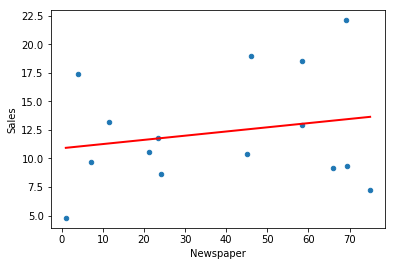

In [39]:
#Linear Regression Line using scatter plot 
df.plot(kind='scatter', x='Newspaper', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


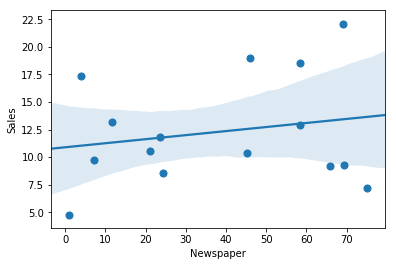

In [40]:
sns.regplot(x='Newspaper',y='Sales',data=df,x_estimator=np.mean)